# Capstone Project - The Battle of Neighborhoods Week 2

# Opening Italian Restaurant in New York

# 1-Introduction

Thousands of people dream of starting and owning a successful restaurant. The key word, of course, is "successful."
In this Project we are going to use Data Science skills to find the best location in York to Open an Italian Restaurant.

#### - Why new York?

New York City (NYC), often called simply New York, is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States. Located at the southern tip of the State of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy.


#### - Food in New York

New York City's food culture includes an array of international cuisines influenced by the city's immigrant history. Central and Eastern European immigrants, especially Jewish immigrants from those regions, brought bagels, cheesecake, hot dogs, knishes, and delicatessens (or delis) to the city. Italian immigrants brought New York-style pizza and Italian cuisine into the city, while Jewish immigrants and Irish immigrants brought pastrami and corned beef, respectively. Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city. Some 4,000 mobile food vendors licensed by the city, many immigrant-owned, have made Middle Eastern foods such as falafel and kebabs examples of modern New York street food. The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world", according to Michelin. The New York City Department of Health and Mental Hygiene assigns letter grades to the city's restaurants based upon their inspection results. As of 2019, there were 27,043 restaurants in the city, up from 24,865 in 2017. The Queens Night Market in Flushing Meadows–Corona Park attracts more than ten thousand people nightly to sample food from more than 85 countries.

# 2-Description of the problem and a discussion of the background

In almost every case the path to entrepreneurial success starts with choosing the right location for their new restaurant.
Clearly that's not easy, though, since every year thousands of restaurants fail.
In this case study we will help investors, entropreneur and business owners choose the best location to open an Italian Restaurant in New York. We will use Data Science methodology to analyse and visualize Data to find the best successful location and answer the question: Wich neighborhoods are best to open an Italian Restaurant in New York?

# 3-Description of the data and how it will be used to solve the problem.

### What we will need to resolve this business Porblem


- New York City Data : neighborhoods, boroughs, latitude, longitude, restaurants
- Data source: https://cocl.us/new_york_dataset
- FourSquare API utilized via the Request library in Python.

# 4-Methodology

A - Data collection and cleaning from into a dataframe https://cocl.us/new_york_dataset


B - we will use FourSquare to locate all venues and we will filter Italian restaurants. By Ratings, tips, and likes by users will be counted and added to the dataframe.


C - Data will be sorted based on rankings.


D - Data Visualization using graphing from Python libraries.

### Problem Statement

- What are the best locations for Eating Italian Food in New York City?
- What are the best Neighborhoods for investor to open an Italian restaurant?
- Where can Customers go in New York City to eat Best Italian foods?

## First Let's import necessary Libraries

In [1]:
!pip install geocoder
!pip install folium

import numpy as np # NumPy is a library support large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd # Pandas library for data manipulation and analysis
from sklearn.cluster import KMeans # K-Means Clustering is an unsupervised machine learning algorithm.
from bs4 import BeautifulSoup # Beautiful Soup is a Python library for pulling data out of HTML and XML files

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os # loads many modules into sys. module

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Represent Geospatial Data 

import matplotlib.pyplot as plt # Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 

res = requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

print('Libraries imported.')

     |████████████████████████████████| 98 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 5.1 MB/s  eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                              /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.7.9|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='2_73_pypy|3_73_pypy|5_73_pypy|4_73_pypy|1_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.

Libraries imported.


# Define Foursquare Credentials and Version

In [2]:
# My Foursquare ID
CLIENT_ID = 'L14LNC10122XHLWJWXCS2DJ21XLVJ5KEIDHWTZSWDU3FC45W'
# My Foursquare Secret
CLIENT_SECRET = 'GOYDOBXABULFLG2BF0HJPIST1FVDXNXCLSWENUILTI15DPFN'
# Version
VERSION = '20180605'
print('Your Credentials: ')
print('CLIENT_ID: '+ CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your Credentials: 
CLIENT_ID: L14LNC10122XHLWJWXCS2DJ21XLVJ5KEIDHWTZSWDU3FC45W
CLIENT_SECRET: GOYDOBXABULFLG2BF0HJPIST1FVDXNXCLSWENUILTI15DPFN


# Define information

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data
    

# Let's visaulize New York Data

In [5]:
ny_data = get_new_york_data()
ny_data.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [6]:
ny_data.tail()

,Borough,Neighborhood,Latitude,Longitude
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631
305,Staten Island,Fox Hills,40.617311,-74.081740


In [7]:
ny_data.shape

(306, 4)

We can see that New York has 306 neighborhoods

# Analyzing Data

pyplot module of matplotlib library is used to display all figures.

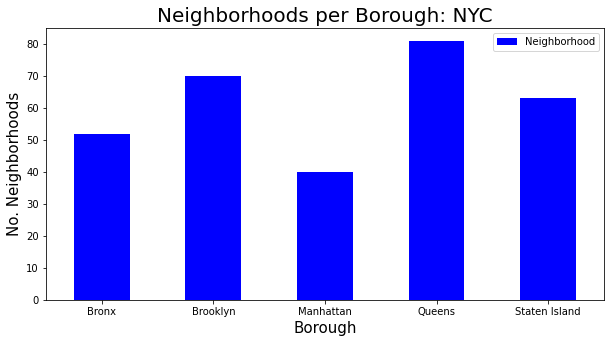

In [8]:
clr = "blue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

As we can see that Queens has the highest number of neighborhoods

### Prepare neighborhoods list that contains italian restaurants

In [9]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_restaurants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(ny_data),')','Italian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(italian_restaurants)))
    print(row)
    for resturant_detail in italian_restaurants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Italian Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Italian Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Italian Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Italian Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Italian Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Italian Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Italian Restaurants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Italian Restaurants in Norwood, Bronx:0
['

( 68 / 306 ) Italian Restaurants in Red Hook, Brooklyn:0
['Brooklyn', 'Red Hook', 40.676253230250886, -74.0127589747356]
( 69 / 306 ) Italian Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Italian Restaurants in Fort Greene, Brooklyn:4
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Italian Restaurants in Park Slope, Brooklyn:2
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Italian Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Italian Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Italian Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 75 / 306 ) Italian Restaurants in Canarsie, Brooklyn:0
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269

( 131 / 306 ) Italian Restaurants in Woodside, Queens:0
['Queens', 'Woodside', 40.74634908860222, -73.90184166838284]
( 132 / 306 ) Italian Restaurants in Jackson Heights, Queens:0
['Queens', 'Jackson Heights', 40.75198138007367, -73.88282109164365]
( 133 / 306 ) Italian Restaurants in Elmhurst, Queens:0
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Italian Restaurants in Howard Beach, Queens:3
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Italian Restaurants in Corona, Queens:1
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Italian Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Italian Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Italian Restaurants in Richmond Hill, Queens:0
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 139 / 306 ) I

( 198 / 306 ) Italian Restaurants in St. George, Staten Island:2
['Staten Island', 'St. George', 40.6449815710044, -74.07935312512797]
( 199 / 306 ) Italian Restaurants in New Brighton, Staten Island:0
['Staten Island', 'New Brighton', 40.64061455913511, -74.08701650516625]
( 200 / 306 ) Italian Restaurants in Stapleton, Staten Island:0
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Italian Restaurants in Rosebank, Staten Island:1
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Italian Restaurants in West Brighton, Staten Island:2
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Italian Restaurants in Grymes Hill, Staten Island:0
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 204 / 306 ) Italian Restaurants in Todt Hill, Staten Island:0
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 205 / 306 ) Italian Restaurants in South Bea

( 259 / 306 ) Italian Restaurants in Elm Park, Staten Island:0
['Staten Island', 'Elm Park', 40.630146741193826, -74.1418167896889]
( 260 / 306 ) Italian Restaurants in Remsen Village, Brooklyn:0
['Brooklyn', 'Remsen Village', 40.652117451793494, -73.91665331978048]
( 261 / 306 ) Italian Restaurants in New Lots, Brooklyn:0
['Brooklyn', 'New Lots', 40.6627442796966, -73.88511776379292]
( 262 / 306 ) Italian Restaurants in Paerdegat Basin, Brooklyn:0
['Brooklyn', 'Paerdegat Basin', 40.63131755039667, -73.90233474295836]
( 263 / 306 ) Italian Restaurants in Mill Basin, Brooklyn:0
['Brooklyn', 'Mill Basin', 40.61597423962336, -73.91515391550404]
( 264 / 306 ) Italian Restaurants in Jamaica Hills, Queens:0
['Queens', 'Jamaica Hills', 40.71145964370482, -73.79646462081593]
( 265 / 306 ) Italian Restaurants in Utopia, Queens:0
['Queens', 'Utopia', 40.73350025429757, -73.79671678028349]
( 266 / 306 ) Italian Restaurants in Pomonok, Queens:0
['Queens', 'Pomonok', 40.73493618075478, -73.80486120

### Save the information to a .csv file

In [10]:
#italian_rest_ny.to_csv('italian_rest_ny_tocsv1.csv') 
italian_rest_ny.to_csv('italian_rest_ny_tocsv1.csv')

#  Display the list of italian restaurants

In [11]:
italian_ny = pd.read_csv('italian_rest_ny_tocsv1.csv')
italian_rest_ny.tail(8)

,Borough,Neighborhood,ID,Name
214,Manhattan,Turtle Bay,4acfb632f964a52076d520e3,Ristorante Grifone
215,Manhattan,Flatiron,5cc3adaa838e59002cb4629d,Rezdôra
216,Manhattan,Flatiron,53370455498e18d7e6607a1d,La Pizza & La Pasta
217,Manhattan,Flatiron,4b741ab4f964a5202cc82de3,Novità Cucina Creativa
218,Queens,Sunnyside Gardens,5699aa86498ef437b2fd7102,Zio Luigi
219,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's
220,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's
221,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde


In [12]:
italian_rest_ny.shape

(222, 4)

There are 222 Italian Restaurants in New York

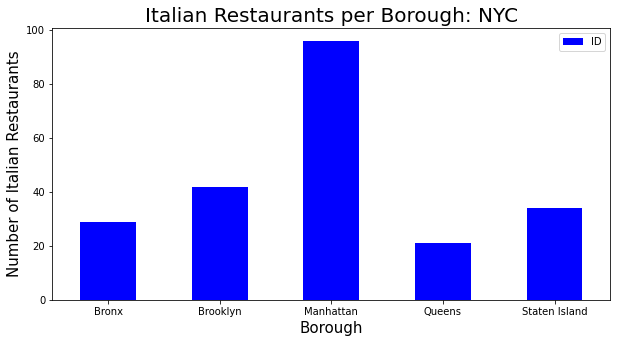

In [13]:
italian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Italian Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Italian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Manhattan has the highest number of italian restaurants per Borough

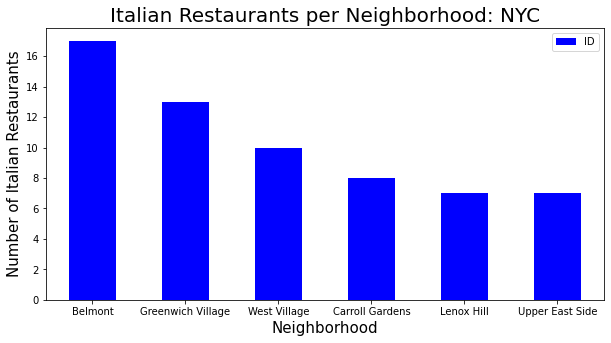

In [14]:
NOofNeigh = 6 # top number for graphing all the same past 6
italian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Italian Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of Italian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Belmont is the neighborhood that has the highest number of Italin Restaurants 

## Adding

In [15]:
italian_rest_ny[italian_rest_ny['Neighborhood']=='Belmont']

,Borough,Neighborhood,ID,Name
6,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
7,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
8,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
9,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
10,Bronx,Belmont,4c9b9e7b9c663704b90463fd,Gerbasi Ristorante
11,Bronx,Belmont,4bc22a22920eb713bcc51b2c,Tra Di Noi
12,Bronx,Belmont,4aa193d5f964a520124120e3,Mario's Restaurant & Catering
13,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
14,Bronx,Belmont,4b5514c4f964a5207cda27e3,Enzo's
15,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant


Bronx in Belmont has the highest number of Italian Restaurants with a total count of 17.

### The ranking of each restaurant

In [16]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in italian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No available data for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest_ny),')','processed')
    italian_rest_stats_ny = italian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
italian_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '6017b8141ba8f361b85d3572'}, 'response': {'venue': {'id': '511edb6de4b0d58346fd272d', 'name': "Patrizia's Of Woodlawn", 'contact': {'phone': '7188845700', 'formattedPhone': '(718) 884-5700'}, 'location': {'address': '4358 Katonah Ave', 'lat': 40.900638399332884, 'lng': -73.86772361835486, 'labeledLatLngs': [{'label': 'display', 'lat': 40.900638399332884, 'lng': -73.86772361835486}, {'label': 'entrance', 'lat': 40.900601, 'lng': -73.867611}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4358 Katonah Ave', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patrizias-of-woodlawn/511edb6de4b0d58346fd272d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}],

{'meta': {'code': 200, 'requestId': '6017b8147f62456957afc93b'}, 'response': {'venue': {'id': '4bf96ae65317a593d837017f', 'name': "Enzo's", 'contact': {'phone': '7184093828', 'formattedPhone': '(718) 409-3828'}, 'location': {'address': '1998 Williamsbridge Rd', 'lat': 40.854232311821725, 'lng': -73.85436243306151, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854232311821725, 'lng': -73.85436243306151}, {'label': 'entrance', 'lat': 40.854116, 'lng': -73.854132}], 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1998 Williamsbridge Rd', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/enzos/4bf96ae65317a593d837017f', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 

{'meta': {'code': 200, 'requestId': '6017b815df0a976dd3c95e32'}, 'response': {'venue': {'id': '4514ed4df964a520e5391fe3', 'name': "Artie's Steak and Seafood", 'contact': {'phone': '7188859885', 'formattedPhone': '(718) 885-9885', 'twitter': 'artiescrazy'}, 'location': {'address': '394 City Island Ave', 'lat': 40.849542144998146, 'lng': -73.78731730033616, 'labeledLatLngs': [{'label': 'display', 'lat': 40.849542144998146, 'lng': -73.78731730033616}, {'label': 'entrance', 'lat': 40.849596, 'lng': -73.787218}], 'postalCode': '10464', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['394 City Island Ave', 'Bronx, NY 10464', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arties-steak-and-seafood/4514ed4df964a520e5391fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',

{'meta': {'code': 200, 'requestId': '6017b8152ef4113be0c5d342'}, 'response': {'venue': {'id': '4b1712a8f964a520dbc123e3', 'name': 'Jolly Tinker', 'contact': {'phone': '3477265644', 'formattedPhone': '(347) 726-5644'}, 'location': {'address': '2875 Webster Ave', 'lat': 40.86745127461597, 'lng': -73.88353583600046, 'labeledLatLngs': [{'label': 'display', 'lat': 40.86745127461597, 'lng': -73.88353583600046}, {'label': 'entrance', 'lat': 40.867508, 'lng': -73.883501}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2875 Webster Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jolly-tinker/4b1712a8f964a520dbc123e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d4898

{'meta': {'code': 200, 'requestId': '6017b8152ef4113be0c5d3e8'}, 'response': {'venue': {'id': '4b10591af964a5205f6e23e3', 'name': "Patricia's", 'contact': {'phone': '7184099069', 'formattedPhone': '(718) 409-9069', 'twitter': 'patriciasnyc'}, 'location': {'address': '1082 Morris Park Ave', 'lat': 40.84931298339339, 'lng': -73.85353576737785, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84931298339339, 'lng': -73.85353576737785}, {'label': 'entrance', 'lat': 40.849229, 'lng': -73.853395}], 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1082 Morris Park Ave', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patricias/4b10591af964a5205f6e23e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary'

{'meta': {'code': 200, 'requestId': '6017b816647af20dfb8245fa'}, 'response': {'venue': {'id': '4acf80aef964a52025d420e3', 'name': "Tino's Delicatessen", 'contact': {'phone': '7187339879', 'formattedPhone': '(718) 733-9879'}, 'location': {'address': '2410 Arthur Ave', 'crossStreet': 'E. 187 St.', 'lat': 40.85588217093613, 'lng': -73.88716612015719, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85588217093613, 'lng': -73.88716612015719}, {'label': 'entrance', 'lat': 40.855816, 'lng': -73.887189}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2410 Arthur Ave (E. 187 St.)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tinos-delicatessen/4acf80aef964a52025d420e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suff

{'meta': {'code': 200, 'requestId': '6017b8162773cf6e395e5ee7'}, 'response': {'venue': {'id': '4af71916f964a520cf0522e3', 'name': "Michaelangelo's Coal Fired Brick Oven Pizza Restaurant", 'contact': {'phone': '3475907650', 'formattedPhone': '(347) 590-7650'}, 'location': {'address': '2477 Arthur Ave', 'lat': 40.85741189614754, 'lng': -73.88646821282298, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85741189614754, 'lng': -73.88646821282298}, {'label': 'entrance', 'lat': 40.857301, 'lng': -73.886231}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2477 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/michaelangelos-coal-fired-brick-oven-pizza-restaurant/4af71916f964a520cf0522e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

{'meta': {'code': 200, 'requestId': '6017b8163415ad6d972a2e8b'}, 'response': {'venue': {'id': '59050f51b23dfa5f6649e678', 'name': 'Arthur Avenue Fiasco', 'contact': {'phone': '7186180806', 'formattedPhone': '(718) 618-0806'}, 'location': {'address': '2376 Arthur Ave', 'crossStreet': '187th street', 'lat': 40.854844, 'lng': -73.887908, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854844, 'lng': -73.887908}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2376 Arthur Ave (187th street)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arthur-avenue-fiasco/59050f51b23dfa5f6649e678', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price'

{'meta': {'code': 200, 'requestId': '6017b81737a6ef7de4fd3f02'}, 'response': {'venue': {'id': '4c9b9e7b9c663704b90463fd', 'name': 'Gerbasi Ristorante', 'contact': {'phone': '7182205735', 'formattedPhone': '(718) 220-5735'}, 'location': {'address': '2389 Arthur Ave', 'lat': 40.855704054640576, 'lng': -73.88741072750854, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.855289, 'lng': -73.887951}, {'label': 'display', 'lat': 40.855704054640576, 'lng': -73.88741072750854}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2389 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gerbasi-ristorante/4c9b9e7b9c663704b90463fd', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verifie

{'meta': {'code': 200, 'requestId': '6017b817f6e2b76ae0d49e00'}, 'response': {'venue': {'id': '4aa193d5f964a520124120e3', 'name': "Mario's Restaurant & Catering", 'contact': {'phone': '7185841188', 'formattedPhone': '(718) 584-1188'}, 'location': {'address': '2342 Arthur Ave', 'crossStreet': 'at Crescent Ave', 'lat': 40.854243777661196, 'lng': -73.88843667516853, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854243777661196, 'lng': -73.88843667516853}, {'label': 'entrance', 'lat': 40.854189, 'lng': -73.88858}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2342 Arthur Ave (at Crescent Ave)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/marios-restaurant--catering/4aa193d5f964a520124120e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categ

{'meta': {'code': 200, 'requestId': '6017b81868fac7611b4f41cf'}, 'response': {'venue': {'id': '4af0fa29f964a52060e021e3', 'name': "Antonio's Trattoria", 'contact': {'phone': '7187336630', 'formattedPhone': '(718) 733-6630'}, 'location': {'address': '2370 Belmont Ave', 'lat': 40.854082862115455, 'lng': -73.88661644989108, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854082862115455, 'lng': -73.88661644989108}, {'label': 'entrance', 'lat': 40.854251, 'lng': -73.886599}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2370 Belmont Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/antonios-trattoria/4af0fa29f964a52060e021e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'veri

( 15 / 222 ) processed
{'meta': {'code': 200, 'requestId': '6017b8180c4e2d5b2e7b4b98'}, 'response': {'venue': {'id': '4b5a4c8ff964a52049bb28e3', 'name': "Emilia's Restaurant", 'contact': {'phone': '7183675915', 'formattedPhone': '(718) 367-5915'}, 'location': {'address': '2331 Arthur Ave', 'lat': 40.85412010500031, 'lng': -73.88890998498077, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85412010500031, 'lng': -73.88890998498077}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2331 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/emilias-restaurant/4b5a4c8ff964a52049bb28e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 17}, 

{'meta': {'code': 200, 'requestId': '6017b818b1ab5d01260ece15'}, 'response': {'venue': {'id': '4aa425bef964a5208e4520e3', 'name': "Dominick's Restaurant", 'contact': {'phone': '7187332807', 'formattedPhone': '(718) 733-2807', 'twitter': 'dominicksrest'}, 'location': {'address': '2335 Arthur Ave', 'lat': 40.85421506482662, 'lng': -73.88876521498301, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85421506482662, 'lng': -73.88876521498301}, {'label': 'entrance', 'lat': 40.854251, 'lng': -73.888834}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2335 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dominicks-restaurant/4aa425bef964a5208e4520e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png

{'meta': {'code': 200, 'requestId': '6017b819e305641b093e2a2a'}, 'response': {'venue': {'id': '4c79d294278eb713f6a05580', 'name': 'Cafe al Mercato', 'contact': {'phone': '7183647681', 'formattedPhone': '(718) 364-7681'}, 'location': {'address': '2344 Arthur Ave', 'lat': 40.85417649340613, 'lng': -73.88808455700543, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85417649340613, 'lng': -73.88808455700543}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2344 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-al-mercato/4c79d294278eb713f6a05580', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message':

( 19 / 222 ) processed
{'meta': {'code': 200, 'requestId': '6017b819ad79125949bbc3f3'}, 'response': {'venue': {'id': '4cb0d382ef1b370419643e00', 'name': "David Greco's Arthur Avenue Trattoria", 'contact': {}, 'location': {'lat': 40.854031511759736, 'lng': -73.88887832314941, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854031511759736, 'lng': -73.88887832314941}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/david-grecos-arthur-avenue-trattoria/4cb0d382ef1b370419643e00', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes'

{'meta': {'code': 200, 'requestId': '6017b81aa4365613b511e445'}, 'response': {'venue': {'id': '44941e38f964a52081341fe3', 'name': 'Arthur Avenue Cafe', 'contact': {'phone': '7185620129', 'formattedPhone': '(718) 562-0129', 'twitter': 'mikesfamousdeli'}, 'location': {'address': '2329 Arthur Ave', 'crossStreet': 'Crescent Avenue', 'lat': 40.85406831774407, 'lng': -73.8888375888388, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85406831774407, 'lng': -73.8888375888388}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2329 Arthur Ave (Crescent Avenue)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arthur-avenue-cafe/44941e38f964a52081341fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary'

{'meta': {'code': 200, 'requestId': '6017b81a68fac7611b4f4885'}, 'response': {'venue': {'id': '4b85b6b3f964a5209b6e31e3', 'name': "Giovanni's Italian Restaurant", 'contact': {'phone': '7188924340', 'formattedPhone': '(718) 892-4340'}, 'location': {'address': '3209 Westchester Ave', 'lat': 40.85178560311938, 'lng': -73.82978599125016, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85178560311938, 'lng': -73.82978599125016}, {'label': 'entrance', 'lat': 40.851846, 'lng': -73.829821}], 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3209 Westchester Ave', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/giovannis-italian-restaurant/4b85b6b3f964a5209b6e31e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}

{'meta': {'code': 200, 'requestId': '6017b81bac754233f61f9c7f'}, 'response': {'venue': {'id': '4c9518076b35a143d5dc21dc', 'name': "Fratelli's", 'contact': {'phone': '7185472489', 'formattedPhone': '(718) 547-2489'}, 'location': {'address': '2507 Eastchester Rd', 'lat': 40.86301897888721, 'lng': -73.84360740712835, 'labeledLatLngs': [{'label': 'display', 'lat': 40.86301897888721, 'lng': -73.84360740712835}, {'label': 'entrance', 'lat': 40.863085, 'lng': -73.8436}], 'postalCode': '10469', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2507 Eastchester Rd', 'Bronx, NY 10469', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fratellis/4c9518076b35a143d5dc21dc', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 's

{'meta': {'code': 200, 'requestId': '6017b81b5047ce5dec8340db'}, 'response': {'venue': {'id': '4bfd8d06f61dc9b669309fde', 'name': "Tiny's Pizza & Pasta", 'contact': {'phone': '7182938346', 'formattedPhone': '(718) 293-8346'}, 'location': {'address': '1113 Grant Ave', 'lat': 40.8309295822695, 'lng': -73.91662582679406, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8309295822695, 'lng': -73.91662582679406}, {'label': 'entrance', 'lat': 40.831001, 'lng': -73.91661}], 'postalCode': '10456', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1113 Grant Ave', 'Bronx, NY 10456', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tinys-pizza--pasta/4bfd8d06f61dc9b669309fde', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': F

{'meta': {'code': 200, 'requestId': '6017b81b3415ad6d972a3c82'}, 'response': {'venue': {'id': '4b70d8dff964a52063312de3', 'name': 'Tuscany Grill', 'contact': {'phone': '7189215633', 'formattedPhone': '(718) 921-5633'}, 'location': {'address': '8620 3rd Ave', 'lat': 40.62291326029698, 'lng': -74.03138652017468, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62291326029698, 'lng': -74.03138652017468}, {'label': 'entrance', 'lat': 40.622918, 'lng': -74.031438}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8620 3rd Ave', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tuscany-grill/4b70d8dff964a52063312de3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 's

{'meta': {'code': 200, 'requestId': '6017b81c44ede7784f80571c'}, 'response': {'venue': {'id': '4e732dff45dd41e9ccce1987', 'name': "Giacomo's Wood Fired Pizza & Trattoria", 'contact': {'phone': '7184396993', 'formattedPhone': '(718) 439-6993'}, 'location': {'address': '7902 3rd Ave', 'lat': 40.62853486510589, 'lng': -74.02905124266296, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62853486510589, 'lng': -74.02905124266296}, {'label': 'entrance', 'lat': 40.628483, 'lng': -74.029154}], 'postalCode': '11209', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7902 3rd Ave', 'Staten Island, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/giacomos-wood-fired-pizza--trattoria/4e732dff45dd41e9ccce1987', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 

{'meta': {'code': 200, 'requestId': '6017b81cad79125949bbcc2f'}, 'response': {'venue': {'id': '5071f049e4b05fb6c443ec8e', 'name': "Zitelli's Thin Crust Pizza and Bar", 'contact': {}, 'location': {'address': '8530-3rd Avenue', 'crossStreet': '86st & 3ave Corner', 'lat': 40.62355539009036, 'lng': -74.03096914529038, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62355539009036, 'lng': -74.03096914529038}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8530-3rd Avenue (86st & 3ave Corner)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/zitellis-thin-crust-pizza-and-bar/5071f049e4b05fb6c443ec8e', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735'

{'meta': {'code': 200, 'requestId': '6017b81c9a674a6d3ac8f9ac'}, 'response': {'venue': {'id': '4e30a139483bb3fdc436a7e3', 'name': 'Villa Fiorita', 'contact': {'phone': '7188377950', 'formattedPhone': '(718) 837-7950'}, 'location': {'address': '7720 18th Ave', 'lat': 40.611931, 'lng': -73.997854, 'labeledLatLngs': [{'label': 'display', 'lat': 40.611931, 'lng': -73.997854}, {'label': 'entrance', 'lat': 40.611851, 'lng': -73.997718}], 'postalCode': '11214', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7720 18th Ave', 'Brooklyn, NY 11214', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/villa-fiorita/4e30a139483bb3fdc436a7e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'pric

{'meta': {'code': 200, 'requestId': '6017b81dac754233f61fa2cb'}, 'response': {'venue': {'id': '5095a98ae4b0038a605e6f45', 'name': 'Cafe Lore', 'contact': {'phone': '7184927100', 'formattedPhone': '(718) 492-7100', 'twitter': 'cafelore1'}, 'location': {'address': '4601 4th Ave', 'crossStreet': '46th Street', 'lat': 40.648474, 'lng': -74.01008900000001, 'labeledLatLngs': [{'label': 'display', 'lat': 40.648474, 'lng': -74.01008900000001}, {'label': 'entrance', 'lat': 40.648525, 'lng': -74.010174}], 'postalCode': '11220', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4601 4th Ave (46th Street)', 'Brooklyn, NY 11220', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-lore/5095a98ae4b0038a605e6f45', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.pn

{'meta': {'code': 200, 'requestId': '6017b81d1ed4402a42b688c8'}, 'response': {'venue': {'id': '4ad8c329f964a520731421e3', 'name': "Joe's of Avenue U", 'contact': {'phone': '7184499285', 'formattedPhone': '(718) 449-9285'}, 'location': {'address': '287 Avenue U', 'lat': 40.596970812269824, 'lng': -73.9736772701698, 'labeledLatLngs': [{'label': 'display', 'lat': 40.596970812269824, 'lng': -73.9736772701698}, {'label': 'entrance', 'lat': 40.597039, 'lng': -73.973681}], 'postalCode': '11223', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['287 Avenue U', 'Brooklyn, NY 11223', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joes-of-avenue-u/4ad8c329f964a520731421e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': F

( 39 / 222 ) processed
{'meta': {'code': 200, 'requestId': '6017b81efd49a110d10f97ce'}, 'response': {'venue': {'id': '5e4567fa2eafa100085e9ec3', 'name': 'Bar Camillo', 'contact': {'phone': '3475336340', 'formattedPhone': '(347) 533-6340', 'instagram': 'barcamillobk'}, 'location': {'address': '333 Tompkins Ave', 'lat': 40.686523, 'lng': -73.944379, 'labeledLatLngs': [{'label': 'display', 'lat': 40.686523, 'lng': -73.944379}], 'postalCode': '11216', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['333 Tompkins Ave', 'Brooklyn, NY 11216', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bar-camillo/5e4567fa2eafa100085e9ec3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'htt

( 40 / 222 ) processed
{'meta': {'code': 200, 'requestId': '6017b81e2773cf6e395e74d1'}, 'response': {'venue': {'id': '5a0740a3e1f22816d11723d5', 'name': 'Lillo', 'contact': {'phone': '3477630899', 'formattedPhone': '(347) 763-0899'}, 'location': {'address': '331 Henry Street', 'lat': 40.690199941477445, 'lng': -73.99654010450837, 'labeledLatLngs': [{'label': 'display', 'lat': 40.690199941477445, 'lng': -73.99654010450837}], 'postalCode': '11201', 'cc': 'US', 'neighborhood': 'Cobble Hill', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['331 Henry Street', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lillo/5a0740a3e1f22816d11723d5', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735'

{'meta': {'code': 200, 'requestId': '6017b81ea4b6dd52e8930ed0'}, 'response': {'venue': {'id': '593329652632ec0582bd71df', 'name': 'Popina', 'contact': {'phone': '7182221901', 'formattedPhone': '(718) 222-1901', 'instagram': 'popinanyc', 'facebook': '1677291285901282', 'facebookUsername': 'PopinaNYC', 'facebookName': 'Popina NYC'}, 'location': {'address': '127 Columbia St', 'lat': 40.687419734537926, 'lng': -74.00143152860893, 'labeledLatLngs': [{'label': 'display', 'lat': 40.687419734537926, 'lng': -74.00143152860893}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['127 Columbia St', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/popina/593329652632ec0582bd71df', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'su

{'meta': {'code': 200, 'requestId': '6017b81f17ea831a186d11d4'}, 'response': {'venue': {'id': '5044f749e4b0dd909d2cc123', 'name': 'Table 87', 'contact': {'phone': '7187979300', 'formattedPhone': '(718) 797-9300'}, 'location': {'address': '87 Atlantic Ave', 'lat': 40.69116378701994, 'lng': -73.99744297710961, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69116378701994, 'lng': -73.99744297710961}, {'label': 'entrance', 'lat': 40.691219, 'lng': -73.997355}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['87 Atlantic Ave', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/table-87/5044f749e4b0dd909d2cc123', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c

{'meta': {'code': 200, 'requestId': '6017b81f8fc20e13d5271961'}, 'response': {'venue': {'id': '49c4ff90f964a520da561fe3', 'name': 'Fragole', 'contact': {'phone': '7185227133', 'formattedPhone': '(718) 522-7133', 'twitter': 'fragoleny', 'facebook': '223164304439051', 'facebookName': 'Fragole Restaurant'}, 'location': {'address': '394 Court St', 'crossStreet': 'btwn 1st Pl & Carroll St.', 'lat': 40.680805, 'lng': -73.99689, 'labeledLatLngs': [{'label': 'display', 'lat': 40.680805, 'lng': -73.99689}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['394 Court St (btwn 1st Pl & Carroll St.)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/fragoleny', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'prim

{'meta': {'code': 200, 'requestId': '6017b81f32a2352a3170bfd6'}, 'response': {'venue': {'id': '4aa85f31f964a520075120e3', 'name': "Vinny's of Carroll Gardens", 'contact': {'phone': '7188755600', 'formattedPhone': '(718) 875-5600'}, 'location': {'address': '295 Smith St', 'crossStreet': 'Btw. Union & Sacket', 'lat': 40.681885, 'lng': -73.99357, 'labeledLatLngs': [{'label': 'display', 'lat': 40.681885, 'lng': -73.99357}, {'label': 'entrance', 'lat': 40.681897, 'lng': -73.993624}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['295 Smith St (Btw. Union & Sacket)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/vinnys-of-carroll-gardens/4aa85f31f964a520075120e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix

{'meta': {'code': 200, 'requestId': '6017b81f37a6ef7de4fd55af'}, 'response': {'venue': {'id': '506cb4a8e4b02db545b4bf5c', 'name': "Claudine's", 'contact': {'phone': '7182374992', 'formattedPhone': '(718) 237-4992', 'facebook': '496394810370638', 'facebookName': "Claudine's"}, 'location': {'address': '311 Smith St', 'crossStreet': 'Smith St & Union St', 'lat': 40.681352187513205, 'lng': -73.99410672670723, 'labeledLatLngs': [{'label': 'display', 'lat': 40.681352187513205, 'lng': -73.99410672670723}, {'label': 'entrance', 'lat': 40.681307, 'lng': -73.99402}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['311 Smith St (Smith St & Union St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/claudines/506cb4a8e4b02db545b4bf5c', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix':

{'meta': {'code': 200, 'requestId': '6017b81f136c014bb60f3f09'}, 'response': {'venue': {'id': '5766ad56498ebf269c3737d2', 'name': 'Gersi', 'contact': {'phone': '3478895077', 'formattedPhone': '(347) 889-5077', 'twitter': 'gersirestaurant'}, 'location': {'address': '316 Court St', 'crossStreet': 'Sackett Street', 'lat': 40.68337949868895, 'lng': -73.99549228030504, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68337949868895, 'lng': -73.99549228030504}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['316 Court St (Sackett Street)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gersi/5766ad56498ebf269c3737d2', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '6017b8203415ad6d972a4765'}, 'response': {'venue': {'id': '5001e284e4b0d8ae060e1035', 'name': 'Ciros on Smith', 'contact': {}, 'location': {'address': '307 Smith St', 'crossStreet': 'Union', 'lat': 40.68148804379713, 'lng': -73.99402221751436, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68148804379713, 'lng': -73.99402221751436}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['307 Smith St (Union)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ciros-on-smith/5001e284e4b0d8ae060e1035', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '

{'meta': {'code': 200, 'requestId': '6017b8208a030b1f610665c5'}, 'response': {'venue': {'id': '4ab98ab8f964a520cf7f20e3', 'name': 'Marco Polo Ristorante', 'contact': {'phone': '7188525015', 'formattedPhone': '(718) 852-5015', 'twitter': 'marcopolorist'}, 'location': {'address': '345 Court St', 'crossStreet': 'at Union St', 'lat': 40.68231096732147, 'lng': -73.99591141723491, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68231096732147, 'lng': -73.99591141723491}, {'label': 'entrance', 'lat': 40.682241, 'lng': -73.995809}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['345 Court St (at Union St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/marco-polo-ristorante/4ab98ab8f964a520cf7f20e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/

KeyError: 'venue'

In [17]:
italian_rest_stats_ny.to_csv('italian_rest_stats_ny_csv.csv') # save data to a .csv file

In [18]:
italian_rest_stats_ny.shape

(50, 7)

In [19]:
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     object 
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


In [20]:
italian_rest_stats_ny['Likes'] = italian_rest_stats_ny['Likes'].astype('float64')
italian_rest_stats_ny['Tips'] = italian_rest_stats_ny['Tips'].astype('float64')
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [21]:
italian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,50.000000,50.000000,50.000000
mean,38.220000,7.788000,17.600000
std,35.159282,0.803726,13.201731
min,3.000000,5.700000,1.000000
25%,12.000000,7.300000,6.250000
50%,26.000000,7.900000,14.000000
75%,50.500000,8.200000,26.750000
max,147.000000,9.300000,48.000000


In [22]:
# Resturant with maximum Likes
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Likes'].idxmax()]

Borough                            Bronx
Neighborhood                     Belmont
ID              4acf80aef964a52025d420e3
Name                 Tino's Delicatessen
Likes                                147
Rating                               9.3
Tips                                  48
Name: 6, dtype: object

In [23]:
# Resturant with maximum Ratings
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Rating'].idxmax()]


Borough                            Bronx
Neighborhood                     Belmont
ID              4acf80aef964a52025d420e3
Name                 Tino's Delicatessen
Likes                                147
Rating                               9.3
Tips                                  48
Name: 6, dtype: object

In [24]:
# Resturant with maximum Tips
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Tips'].idxmax()]

Borough                            Bronx
Neighborhood                     Belmont
ID              4acf80aef964a52025d420e3
Name                 Tino's Delicatessen
Likes                                147
Rating                               9.3
Tips                                  48
Name: 6, dtype: object

# Now let's identify and visualize neighborhood with the maximum average rating of restaurants

In [25]:
ny_neighborhood_stats=italian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
5,Bushwick,9.300000
2,Bedford Stuyvesant,9.000000
19,Woodlawn,8.600000
16,Pelham Gardens,8.400000
8,Cobble Hill,8.400000
13,Morris Park,8.200000
7,City Island,8.100000
3,Belmont,7.982353
11,Gravesend,7.900000
4,Bensonhurst,7.650000


In [26]:
ny_borough_stats=italian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Bronx,7.867857
1,Brooklyn,7.686364


# Let's visualize the results

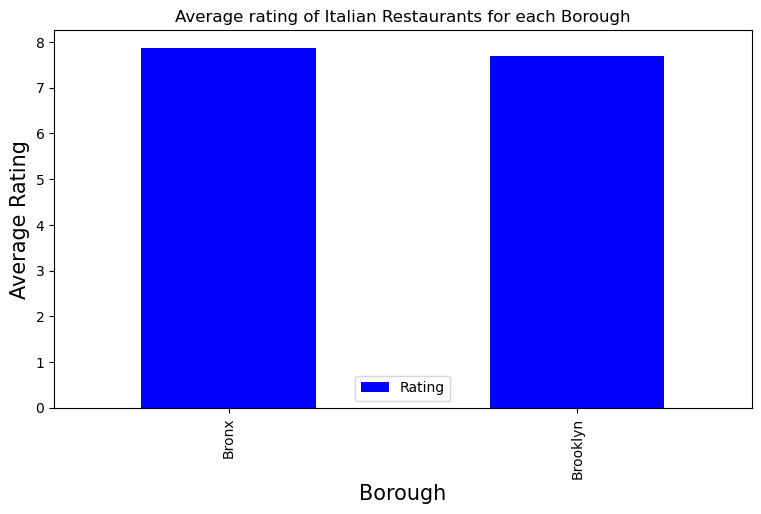

In [27]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Italian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
italian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

### We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

In [28]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
2,Bedford Stuyvesant,9.0
5,Bushwick,9.3
7,City Island,8.1
8,Cobble Hill,8.4
13,Morris Park,8.2
16,Pelham Gardens,8.4
19,Woodlawn,8.6


# We will join this Dataset to original New York data to get longitude and latitude

In [29]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,9.0
1,Brooklyn,Bushwick,40.698116,-73.925258,9.3
2,Bronx,City Island,40.847247,-73.786488,8.1
3,Brooklyn,Cobble Hill,40.687920,-73.998561,8.4
4,Bronx,Morris Park,40.847549,-73.850402,8.2
5,Bronx,Pelham Gardens,40.862966,-73.841612,8.4
6,Bronx,Woodlawn,40.898273,-73.867315,8.6


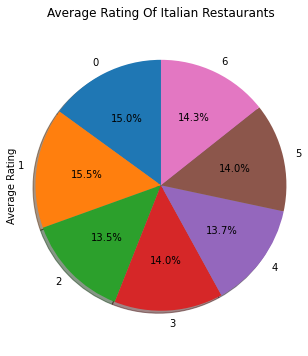

In [38]:
# autopct create %, start angle represent starting point
ny_neighborhood_stats['Average Rating'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title('Average Rating Of Italian Restaurants')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

In [33]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

In [34]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

# Conclusion

In This Data Science case study, I found that Bronx and Brooklyn have the best rate for Italian restaurants on average.
 

For investors it will be best to open an Italian restaurant in Bronx or Brooklyn in NEW YORK

#### This notebook was created by Mohamed ALi